# Fase 1: Exploración y Limpieza

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [592]:
df_customerFlight = pd.read_csv("Customer Flight Activity.csv")
df_customerLoyalty = pd.read_csv("Customer Loyalty History.csv")

## 1. Exploración Inicial:
- Realiza un EDA. Haz una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de
valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.
## 2. Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén
completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma
coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para
garantizar la adecuación de los datos para el análisis estadístico.
- Une, borra o modifica las columnas que veas necesarias.
- Debe quedar todo sin nulos, con columnas sin errores y coherentes.

In [593]:
#Se realiza una primera exploración de las tablas y se miran si hay valores duplicados

In [594]:
df_customerFlight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [595]:
df_customerLoyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [596]:
df_customerFlight.duplicated().sum()

1864

In [597]:
df_customerLoyalty.duplicated().sum()

0

In [598]:
# Se encuentran 1864 registros duplicados en la tabla de Customer Flight, por lo que se procede al borrado de dichos registros.
df_customerFlight = df_customerFlight.drop_duplicates()

In [599]:
# Se verifica que se han borrado correctamente
df_customerFlight.duplicated().sum()

0

In [600]:
# Se observa que se puede identificar la columna "Loyalty Number" como identificador único de usuario, por lo que se configura como índice en ambas tablas. 
df_customerLoyalty = df_customerLoyalty.set_index('Loyalty Number')

In [601]:
df_customerFlight = df_customerFlight.set_index('Loyalty Number')


In [602]:
# Para poder hacer un análisis más completo y de forma ágil, se unen las tablas

df_loyalty = df_customerFlight.join(df_customerLoyalty) 
df_loyalty

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN


In [603]:
# Siguiente paso se revisan todas las columnas, para ver los distintos tipos que se tienen 
df_loyalty.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [604]:
# Se identifica una primera columna con información no importante para el análisis de los datos a realizar
df_loyalty.drop("Postal Code", axis = 1, inplace = True)

In [605]:
# Se procede a renombrar los meses observados dentro de las columnas "Month" y "Enrollment Month" y a convertirlos en objetos

In [606]:
df_loyalty["Month"].unique()

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12], dtype=int64)

In [607]:
df_loyalty["Enrollment Month"].unique()

array([ 8,  3,  7,  1,  9,  5, 10,  2,  4,  6, 11, 12], dtype=int64)

In [608]:
# Transformamos las columnas que son meses en objeto, haciendo la correlación de cada número con su mes correspondiente

month = {1:"Jan", 2:"Feb", 3:"March", 4: "Apr", 5: "May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12: "Dec"}
df_loyalty['Month'] = df_loyalty['Month'].map(month)
df_loyalty['Enrollment Month'] = df_loyalty['Enrollment Month'].map(month)
df_loyalty['Cancellation Month'] = df_loyalty['Cancellation Month'].map(month)

In [609]:
#Validamos el cambio, se ha pasado las tres columnas. Pero en Cancelados observamos que hay valores NULOS. Se trabajarán con posterioridad. 
df_loyalty['Cancellation Month'].unique()

array([nan, 'March', 'Sep', 'Feb', 'Jul', 'Jun', 'Aug', 'Apr', 'Jan',
       'May', 'Nov', 'Dec', 'Oct'], dtype=object)

In [610]:
# Se transforman los años en objetos para su posterior explotación. De esta manera nos quedamos con int y float en aquellas columnas eu tiene más sentido.

df_loyalty['Year'] = df_loyalty['Year'].astype(object)
df_loyalty['Enrollment Year'] = df_loyalty['Enrollment Year'].astype(object)
df_loyalty['Cancellation Year'] = df_loyalty['Cancellation Year'].astype(object)

In [611]:
df_loyalty.dtypes

Year                            object
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                 object
Enrollment Month                object
Cancellation Year               object
Cancellation Month              object
dtype: object

In [612]:
# Identificamos cuántos valores nulos tenemos en las columnas 
null = (df_loyalty.isnull().sum()/df_loyalty.shape[0]*100).round()
null.sort_values(ascending=False)

Cancellation Month             88.0
Cancellation Year              88.0
Salary                         25.0
Gender                          0.0
Enrollment Month                0.0
Enrollment Year                 0.0
Enrollment Type                 0.0
CLV                             0.0
Loyalty Card                    0.0
Marital Status                  0.0
Education                       0.0
Year                            0.0
Month                           0.0
Province                        0.0
Country                         0.0
Dollar Cost Points Redeemed     0.0
Points Redeemed                 0.0
Points Accumulated              0.0
Distance                        0.0
Total Flights                   0.0
Flights with Companions         0.0
Flights Booked                  0.0
City                            0.0
dtype: float64

In [613]:
# En cuanto a cancelados. Si NO hay fecha de cancelación, quiere decir que ese vuelo no fue cancelado. Por tanto, observamos que solo un 12% de los vuelos son cancelados.
# Es un dato suficiente relevante que no necesitaría de más análisis. Sin embargo, se decide cambiar los nulos por "No Cancelled" por si se quiere mostrar en una gráfica posteriormente

columnas_cancellation = ["Cancellation Month", "Cancellation Year"]

for col in columnas_cancellation:
    df_loyalty[col] = df_loyalty[col].fillna('No Cancelled')

In [614]:
null = (df_loyalty.isnull().sum()/df_loyalty.shape[0]*100).round()
null.sort_values(ascending=False)

Salary                         25.0
Year                            0.0
Gender                          0.0
Cancellation Year               0.0
Enrollment Month                0.0
Enrollment Year                 0.0
Enrollment Type                 0.0
CLV                             0.0
Loyalty Card                    0.0
Marital Status                  0.0
Education                       0.0
City                            0.0
Month                           0.0
Province                        0.0
Country                         0.0
Dollar Cost Points Redeemed     0.0
Points Redeemed                 0.0
Points Accumulated              0.0
Distance                        0.0
Total Flights                   0.0
Flights with Companions         0.0
Flights Booked                  0.0
Cancellation Month              0.0
dtype: float64

In [615]:
# En salary, tenemos un 25% de nulos. Por tanto, estamos ante una variable númerica con un % elevado de nulos. Se procede a imputarse con técnicas más avanzadas
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


In [616]:
# IMPORTANTE! Hay un valor negativo al que habrá que prestar atención. 
df_loyalty["Salary"].describe().T

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64

In [617]:
# Se analiza la distribución de los valores de salary. 
display(df_loyalty["Salary"].value_counts(dropna=False, normalize=True) * 100)

Salary
NaN         25.326927
101933.0     0.136715
62283.0      0.083218
51573.0      0.083218
61809.0      0.083218
              ...    
65742.0      0.005944
48096.0      0.005944
83257.0      0.005944
63076.0      0.005944
56345.0      0.005944
Name: proportion, Length: 5891, dtype: float64

In [618]:
# Aplicamos la técnica avanzada
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_loyalty['Salary'] = imputer_iter.fit_transform(df_loyalty[['Salary']])

In [619]:
# Se verifica el cambio
display(df_loyalty["Salary"].value_counts(dropna=False, normalize=True) * 100)

Salary
79258.576285     25.326927
101933.000000     0.136715
62283.000000      0.083218
51573.000000      0.083218
61809.000000      0.083218
                   ...    
65742.000000      0.005944
48096.000000      0.005944
83257.000000      0.005944
63076.000000      0.005944
56345.000000      0.005944
Name: proportion, Length: 5891, dtype: float64

In [620]:
# Se verifica que el cambio no ha implicado cambios significantes y que no hay sesgo
df_loyalty["Salary"].describe().T

count    403760.000000
mean      79258.576285
std       30230.854484
min      -58486.000000
25%       63901.000000
50%       79258.576285
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64

In [621]:
# DATO NEGATIVO! Se analiza qué impacto tiene este dato negativo y se decide que no tiene relevancia. Los datos que presentan este error suponen un 0,11% de la muestra. 
df_loyalty[df_loyalty['Salary'] < 0]['Salary'].count()/df_loyalty.shape[0] * 100

0.11888250445809391

In [622]:
# Para tener una tabla con los datos correctos de decide eliminar los registros con datos negativos en Salario

items_to_delete = df_loyalty[df_loyalty['Salary'] < 0]
items_to_delete

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
115505,2017,Jan,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,Apr,No Cancelled,No Cancelled
152016,2017,Jan,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,Feb,No Cancelled,No Cancelled
194065,2017,Jan,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,Feb,No Cancelled,No Cancelled
212128,2017,Jan,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,Feb,No Cancelled,No Cancelled
232755,2017,Jan,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,March,No Cancelled,No Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734647,2018,Dec,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,Apr,No Cancelled,No Cancelled
790475,2018,Dec,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,Feb,No Cancelled,No Cancelled
906428,2018,Dec,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,Apr,No Cancelled,No Cancelled


In [623]:
df_loyalty = df_loyalty.drop(items_to_delete.index)


In [624]:
df_loyalty["Salary"].describe().T

count    403280.000000
mean      79395.212063
std       29983.303025
min       15609.000000
25%       63985.000000
50%       79258.576285
75%       82969.000000
max      407228.000000
Name: Salary, dtype: float64

In [625]:
# Verificamos por última vez los nulos de nuestra tabla. En este momento, ya deberían quedar solucionados
null = (df_loyalty.isnull().sum()/df_loyalty.shape[0]*100).round()
null.sort_values(ascending=False)

Year                           0.0
Gender                         0.0
Cancellation Year              0.0
Enrollment Month               0.0
Enrollment Year                0.0
Enrollment Type                0.0
CLV                            0.0
Loyalty Card                   0.0
Marital Status                 0.0
Salary                         0.0
Education                      0.0
City                           0.0
Month                          0.0
Province                       0.0
Country                        0.0
Dollar Cost Points Redeemed    0.0
Points Redeemed                0.0
Points Accumulated             0.0
Distance                       0.0
Total Flights                  0.0
Flights with Companions        0.0
Flights Booked                 0.0
Cancellation Month             0.0
dtype: float64

In [626]:
df_loyalty.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,Jan,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,Aug,No Cancelled,No Cancelled
100102,2017,Jan,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,Male,College,79258.576285,Single,Nova,2887.74,Standard,2013,March,No Cancelled,No Cancelled
100140,2017,Jan,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,Female,College,79258.576285,Divorced,Nova,2838.07,Standard,2016,Jul,No Cancelled,No Cancelled
100214,2017,Jan,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,Aug,No Cancelled,No Cancelled
100272,2017,Jan,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,Jan,No Cancelled,No Cancelled


In [627]:
df_loyalty.tail()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
999902,2018,Dec,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,Male,College,79258.576285,Married,Aurora,7290.07,Standard,2014,May,No Cancelled,No Cancelled
999911,2018,Dec,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,Aug,No Cancelled,No Cancelled
999940,2018,Dec,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,Jul,No Cancelled,No Cancelled
999982,2018,Dec,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,Male,College,79258.576285,Married,Star,2631.56,Standard,2018,Jul,No Cancelled,No Cancelled
999986,2018,Dec,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,Female,Bachelor,46594.000000,Married,Nova,8257.01,2018 Promotion,2018,Feb,No Cancelled,No Cancelled


In [628]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Flights Booked,403280.0,4.134576,5.229838,0.00,0.00,1.000000,8.00,21.00
Flights with Companions,403280.0,1.036848,2.080584,0.00,0.00,0.000000,1.00,11.00
Total Flights,403280.0,5.171424,6.526725,0.00,0.00,1.000000,10.00,32.00
Distance,403280.0,1214.679684,1434.074441,0.00,0.00,525.000000,2343.00,6293.00
Points Accumulated,403280.0,124.286172,146.694159,0.00,0.00,53.750000,240.00,676.50
Points Redeemed,403280.0,30.851726,125.778224,0.00,0.00,0.000000,0.00,876.00
Dollar Cost Points Redeemed,403280.0,2.497039,10.173683,0.00,0.00,0.000000,0.00,71.00
Salary,403280.0,79395.212063,29983.303025,15609.00,63985.00,79258.576285,82969.00,407228.00
CLV,403280.0,7988.569879,6857.650824,1898.01,3981.78,5775.520000,8936.82,83325.38


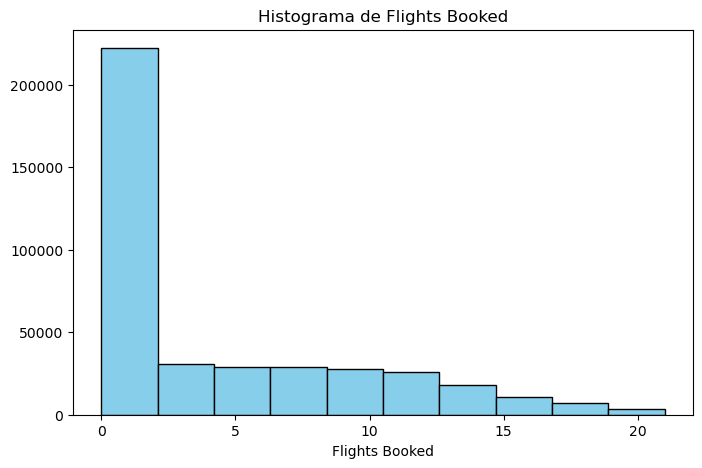

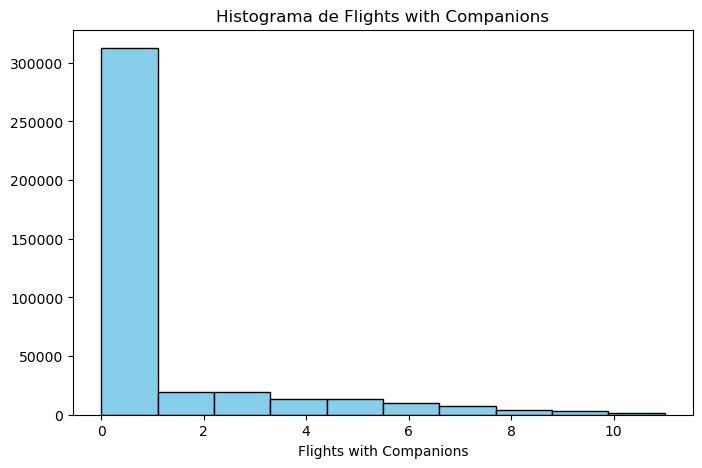

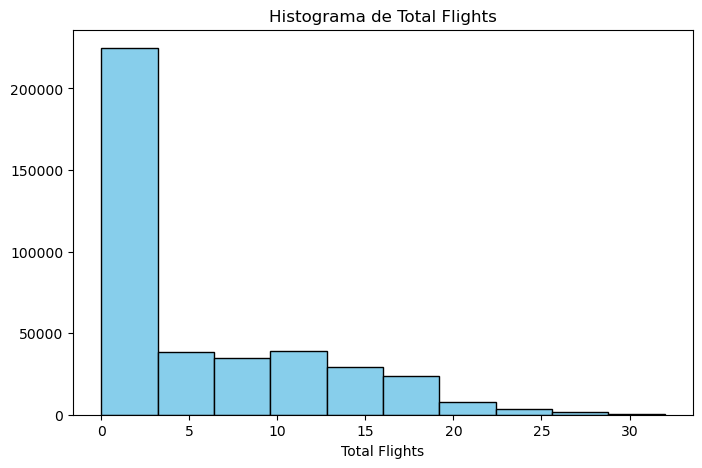

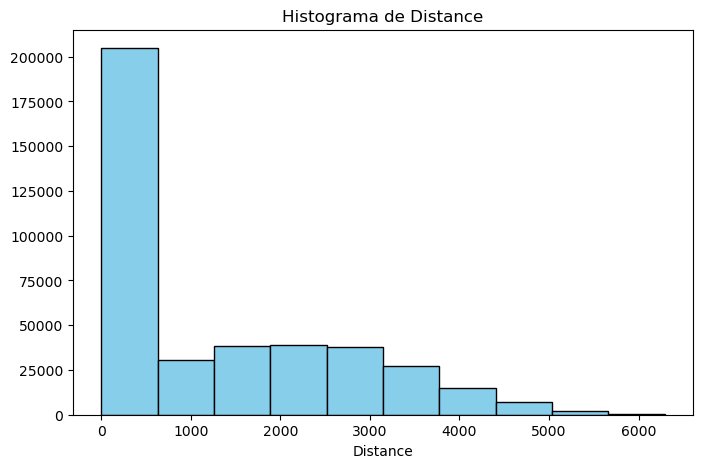

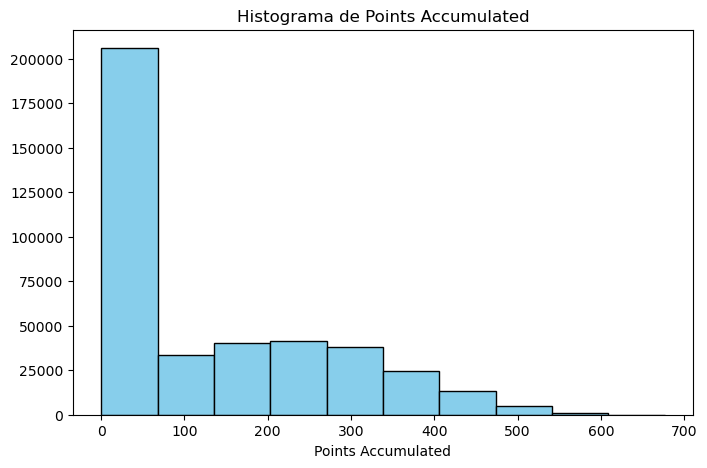

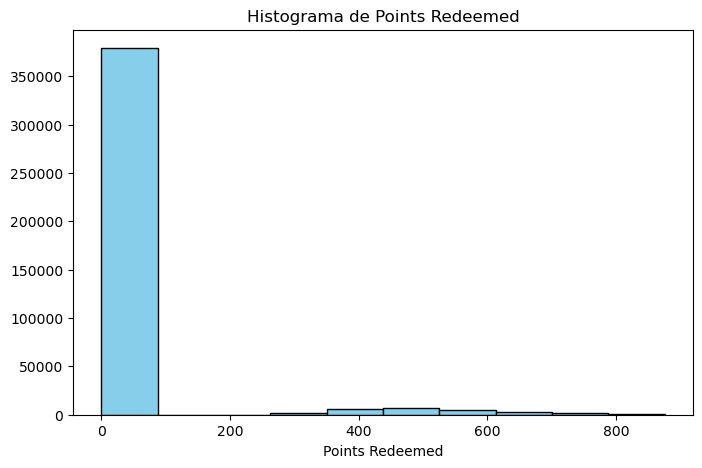

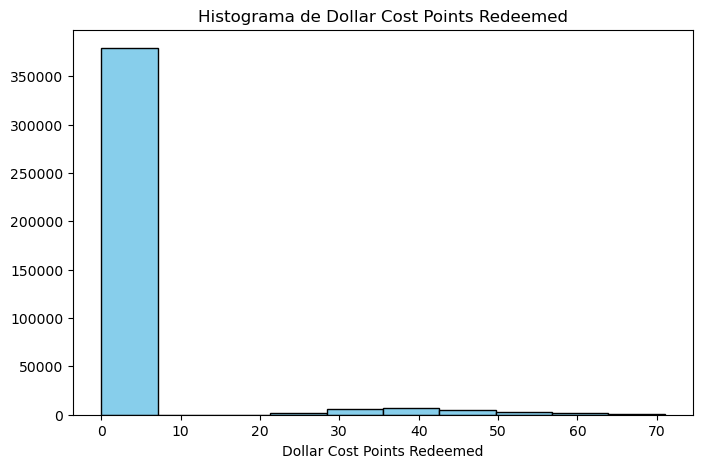

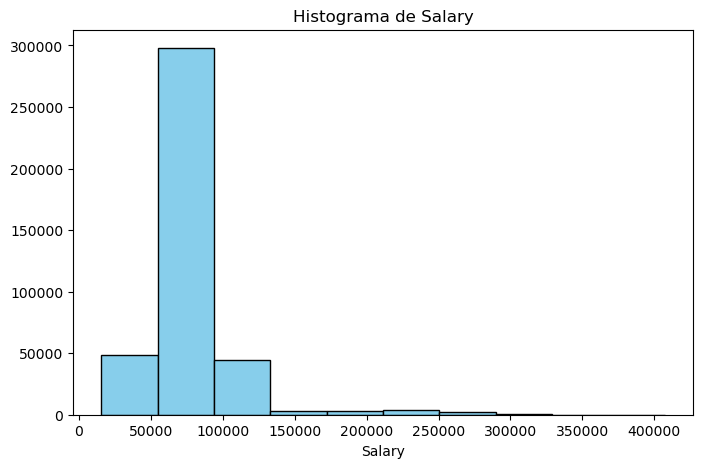

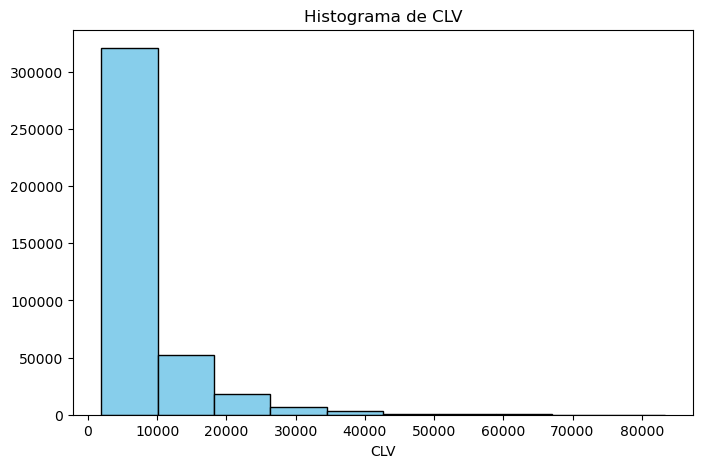

In [629]:
# Eliminados y/o transformados los nulos, prodecemos a ver la distribución de los datos visualmente. Nos da una primera visión que de hay dos grupos de clientes. 
# Los que NO han hecho nada o tienen poca iteración y los que si. Se analiza´ra en el siguiente ejercicio.
import matplotlib.pyplot as plt

for col in df_loyalty.select_dtypes(include = "number").columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df_loyalty[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.show()